# Neural Networks
### Dhavide Aruliah
#### Jan. 22, 2019

## Recommended reading

+ **Neural Networks &amp; Deep Learning** by *Michael Nielsen*
+ excellent reading, builds concepts with minimal mathematics
+ `neuralnetworksanddeeplearning.com`
+ `michaelnielsen.org`

![](./images/nn-book.png)
 *

## Another resource

+ **Deep Learning with Python** by *Francois Chollet*
+ excellent presentation of `keras` in Python
+ Jupyter notebook examples (MIT license) to get started
+ `www.manning.com/books/deep-learning-with-python`
+ `www.linkedin.com/in/fchollet`
+ `https://github.com/fchollet/deep-learning-with-python-notebooks`

![](./images/chollet.jpeg)


![](./images/chollet-gh.png)

# 1: Getting started

+ MNIST digit multi-class classification problem
+ grayscale $28 \times 28$ images of handwritten digits
+ ten categories: digits 0 to 9
+ 60,000 training images & 10,000 test images

In [1]:
# standard boilerplate
import keras
import numpy as np
import matplotlib.pyplot as plt
print(keras.__version__)
%matplotlib inline

Using TensorFlow backend.


2.2.4


### Loading the MNIST data

In [2]:
from keras.datasets import mnist

# This downloads data onto your machine if data not present already
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print('Shape of images: {}'.format(train_images.shape))
print('Shape of labels: {}'.format(train_labels.shape))

Shape of images: (60000, 28, 28)
Shape of labels: (60000,)


Associated label: 7


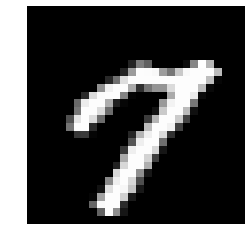

In [4]:
# Extract one image
k = 30065
digit_image = train_images[k]
plt.imshow(digit_image, cmap='gray')
plt.axis('off')
print('Associated label: {}'.format(train_labels[k]))

## Workflow:

+ *preprocessing*: prepare training & test data (if required)
+ *construction*: specify architecture & compile the neural network
+ *training*: use `train_images` and `train_labels` to determine network parameters
+ *evaluation*: use `test_images` as input to generate predictions & compare to `test_labels`

### Preprocessing stage

+ prepare *test* and *training* data as suitable input for neural network
+ reshaping images, converting to floating-point numeric data
+ converting integer targets to binary vectors (*one-hot encoding*)

In [5]:
# Preprocessing: reshaping, converting data type of images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [6]:
# Preprocessing: converting labels to categoricals
from keras.utils import to_categorical

print('before: (1st 5 entries of train_labels)\n', train_labels[:5])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print('after: (1st 5 entries of train_labels)\n', train_labels[:5])

before: (1st 5 entries of train_labels)
 [5 0 4 1 9]
after: (1st 5 entries of train_labels)
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Construction stage

+ instantiate `models` objects to build neural networks
+ select architecture (layers, hidden units, etc.)
+ compile model prior to feeding data in

In [7]:
# Construction: specifying architecture of neural network
from keras import models
from keras import layers

network = models.Sequential()

In [8]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# output layer: 10 'probability scores'
network.add(layers.Dense(10, activation='softmax'))

In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Training stage

In [10]:
# Training: actual computation...
network.fit(train_images, train_labels, epochs=5, batch_size=128);

Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.2561 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.1023 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0683 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.0494 - acc: 0.9855
Epoch 5/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.0374 - acc: 0.9890


### Evaluation stage

In [11]:
# Evaluation: assessing loss & accuracy on test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss: {}'.format(test_loss))
print('test_acc:  {}'.format(test_acc))

10000/10000 [==============================] - 1s 50us/step
test_loss: 0.07246480950559489
test_acc:  0.9783


# 2: IMDB Movie Review Classification

+ binary classification problem (positive or negative review)
+ 25,000 positive reviews, 25,000 negative reviews (balanced)
+ similar workflow to MNIST, different structure to data
+ specify top 10,000 words

### Loading the IMDB data

In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print('Shape of data: {}'.format(train_data.shape))
print('Shape of labels: {}'.format(train_labels.shape))

Shape of data: (25000,)
Shape of labels: (25000,)


In [13]:
k = 420
print('{}th review: {}'.format(k, train_data[k]))
print('Associated label: {}'.format(train_labels[k]))

420th review: [1, 146, 24, 6, 194, 337, 7, 2, 2, 33, 4, 118, 7, 211, 6, 171, 28, 77, 179, 52, 808, 7, 925, 18, 35, 2, 21, 14, 31, 9, 43, 53, 7, 4, 172, 21, 329, 10, 10, 19, 6, 620, 58, 7, 2, 13, 535, 53, 74, 300, 462, 175, 2, 4, 64, 147, 6380, 462, 26, 54, 915, 5082, 5, 369, 2, 339, 46, 4711, 109, 10, 10, 32, 13, 70, 135, 9, 798, 13, 4619, 50, 9, 33, 222, 158, 85, 102, 23, 4, 4200, 15, 1833, 25, 10, 10, 342, 7, 46, 158, 5, 64, 2, 146, 6, 194, 848, 337]
Associated label: 0


+ translating integer list to text review

In [14]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[k]])
print(decoded_review)

? i'm not a big fan of ? ? at the best of times a few have been quite good check of dream for an ? but this one is just more of the same but less br br with a running time of ? i expect more than 1 laugh every ? the only real belly laugh are when male strangers and friends ? help out lee's character br br all i can say is avoid i guarantee there is at least 10 other movies on the shelf that deserve you br br 3 of out 10 and only ? i'm a big lee fan


### Preprocessing stage

+ prepare *test* and *training* data as suitable input for neural network
+ must transform lists of integers into *tensors* for input to neural network
+ choose one-hot encoding again (results in 10,000-dimensional binary vectors for each review)


In [15]:
# Preprocessing
def vectorize_sequences(sequences, dim=10000):
    # Construct 2D matrix of shape (len(sequences), dim)
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [16]:
print(x_train[k].shape)
print(x_train[k])

(10000,)
[0. 1. 1. ... 0. 0. 0.]


In [17]:
# Convert labels to floating-point values
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Construction stage

+ choose two dense hidden layers
+ choose "hidden units" 16 for internal layers
+ choose `relu` for activation function (internal layers)
+ choose `sigmoid` for activation function (output layer)

In [18]:
# Construction...
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Training stage

+ split training data into validation and training data
+ useful for *parameter tuning*
+ store history when fitting to examine loss & accuracy

In [20]:
# Training...
# Extracting validation set from training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# Use validation data & partial training data, track results
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=0)

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

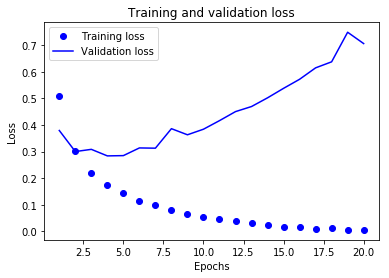

In [23]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

![](./images/loss-2.1.png)

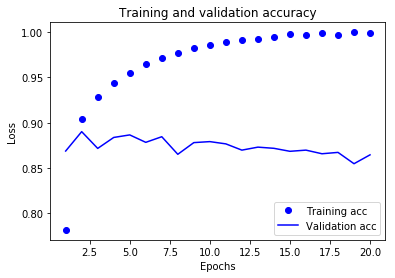

In [24]:
plt.clf()   # clear figure
#acc_values = history_dict['binary_accuracy']
#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

![](./images/acc-2.1.png)

+ *hyperparameter tuning* from accuracy on training/validation sets
+ in this case, switch to modest number of epochs

In [25]:
# Try again with 4 epochs; use all training data this time
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 83us/step


### Evaluation stage

In [26]:
print(results)
model.predict(x_test) # probabilities (likelihood of positive)

[0.32340447722434995, 0.87328]


array([[0.13827495],
       [0.9996934 ],
       [0.29736218],
       ...,
       [0.07238548],
       [0.04326698],
       [0.47121906]], dtype=float32)

# 3: Predicting housing prices

+ Boston housing data set: 506 observations
+ predicting median house prices in suburb of Boston from mid-1970s
+ thirteen features including average number of rooms, property tax rate, etc.
+ targets in thousands of dollars median house price

### Loading the Boston housing data

In [27]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()
print('Shape of training data:    {}'.format(train_data.shape))
print('Shape of training targets: {}'.format(train_targets.shape))
print('Shape of test data:        {}'.format(test_data.shape))
print('Shape of test targets:     {}'.format(test_targets.shape))

Shape of training data:    (404, 13)
Shape of training targets: (404,)
Shape of test data:        (102, 13)
Shape of test targets:     (102,)


In [28]:
print(train_data[5], train_targets[5])

[2.8392e-01 0.0000e+00 7.3800e+00 0.0000e+00 4.9300e-01 5.7080e+00
 7.4300e+01 4.7211e+00 5.0000e+00 2.8700e+02 1.9600e+01 3.9113e+02
 1.1740e+01] 18.5


### Preprocessing stage

+ ranges, length scales of housing data features variable
+ convert to *z-scores* to standardize before applying regression
+ must use mean, standard deviation from *training* set to normalize *test* set

In [29]:
# Preprocessing
# Recalibrate features to have common scales (z-scores)
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean # NB: test data recalibrated using training data!
test_data /= std

In [30]:
print(train_data[5], train_targets[5])

[-0.37502238 -0.48361547 -0.54747912 -0.25683275 -0.54935658 -0.78865126
  0.18954148  0.48371503 -0.51114231 -0.71552978  0.51145832  0.38669063
 -0.13812828] 18.5


### Construction stage

+ embed logic for model construction within function
+ will be reinstantiated many times for cross-validation
+ two hidden layers, 64 hidden units in each
+ `relu` activation function in internal layers
+ last layer purely linear (common for regression)
+ `mse`: "Mean Square Error" for loss function
+ `mae`: "Mean Absolute Error" as accuracy metric

In [31]:
# Construction...
def build_model():
    # will have to instantiate several times
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### Training stage

+ small network to mitigate overfitting
+ rather than hodling out validation set, use *K-fold cross-validation*
+ with $k=4$ folds, mean-absolute-errors accumulated in `all_scores`
+ 100 epochs used for training in each fold

In [32]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [33]:
print(all_scores)
print(np.mean(all_scores)) # mean absolute error from targets (thousands of dollars)

[2.0716496080455213, 2.1526371016360746, 2.9462183890956464, 2.4302362315725574]
2.40018533258745


In [34]:
# try again with more epochs...
# do clean-up first...
import keras.backend
keras.backend.clear_session()

In [36]:
# This takes some time... about 10 minutes on my laptop
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

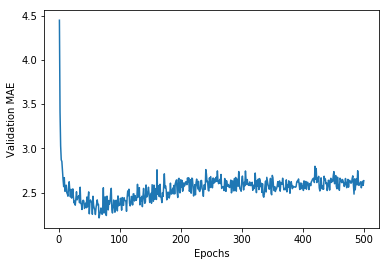

In [38]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

![](./images/avg-mae-3.1.png)

+ training again, $k=4$ folds, 500 epochs
+ average validation mean-absolute-error variable

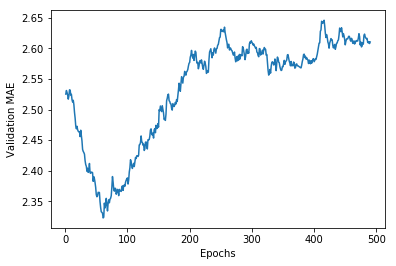

In [39]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

![](./images/avg-mae-smoothed-3.2.png)

+ smoothing preceding curve reveals larger dip around 50-60 epochs

### Evaluation stage

In [57]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=50, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 2ms/step
2.7069613138834634


# Summary

+ `keras`: useful Python interface for neural networks
+ preprocessing needed to convert data to numerical tensors
+ neural networks can be applied generally to regression & classification
+ experimentation/cross-validation useful for determining model hyperparameters
